In [1]:
%load_ext autoreload
%autoreload 2

import spatialdata as sd

import bento as bt

# Format Xenium data

In [2]:
sdata = sd.read_zarr("/mnt/d/sdata/Xenium_V1_humanLung_Cancer_FFPE/data.zarr/")
sdata

SpatialData object with:
├── Images
│     └── 'morphology_focus': MultiscaleSpatialImage[cyx] (5, 17098, 51187), (5, 8549, 25593), (5, 4274, 12796), (5, 2137, 6398), (5, 1068, 3199)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (12165021, 11) (3D points)
└── Shapes
      ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
      ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
      └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
with coordinate systems:
▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_boundaries (Shapes)

In [3]:
from spatialdata.transformations import Scale

scale = sdata["transcripts"].attrs["transform"]["global"]
scale2d = Scale(scale.to_scale_vector(["x", "y"]), axes=["x", "y"])
sd.transformations.set_transformation(sdata.points["transcripts"], scale2d)

In [4]:
sdata.points["transcripts"] = sdata.points["transcripts"].drop("z", axis=1)

In [15]:
crop = sd.bounding_box_query(
    sdata,
    axes=["x", "y"],
    min_coordinate=[20000, 8000],
    max_coordinate=[23000, 11000],
    target_coordinate_system="global",
)

In [18]:
del crop.images["morphology_focus"]
del crop.labels["cell_labels"]
del crop.labels["nucleus_labels"]

In [16]:
crop["transcripts"].attrs["spatialdata_attrs"]["instance_key"] = "cell_boundaries"

In [20]:
crop.write("/mnt/d/sdata/Xenium_V1_humanLung_Cancer_FFPE/crop.zarr/")

# Test method compatibility

In [13]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import spatialdata as sd
import bento as bt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
crop = sd.read_zarr("/mnt/d/sdata/Xenium_V1_humanLung_Cancer_FFPE/crop.zarr/")

In [21]:
bt.io.prep(crop)

  0%|          | 0/3 [00:00<?, ?it/s]

SpatialData object with:
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 12) (2D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (4064, 3) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (4190, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (3978, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 4064 × 541
    obs: 'cell_boundaries', 'region'
    uns: 'spatialdata_attrs': AnnData (4064, 541)
with coordinate systems:
▸ 'global', with elements:
        transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_boundaries (Shapes)

In [22]:
res = 1
bt.tl.flux(crop, res=res, recompute=True, num_workers=16)

  0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/581 [00:00<?, ?it/s]

<built-in function len>


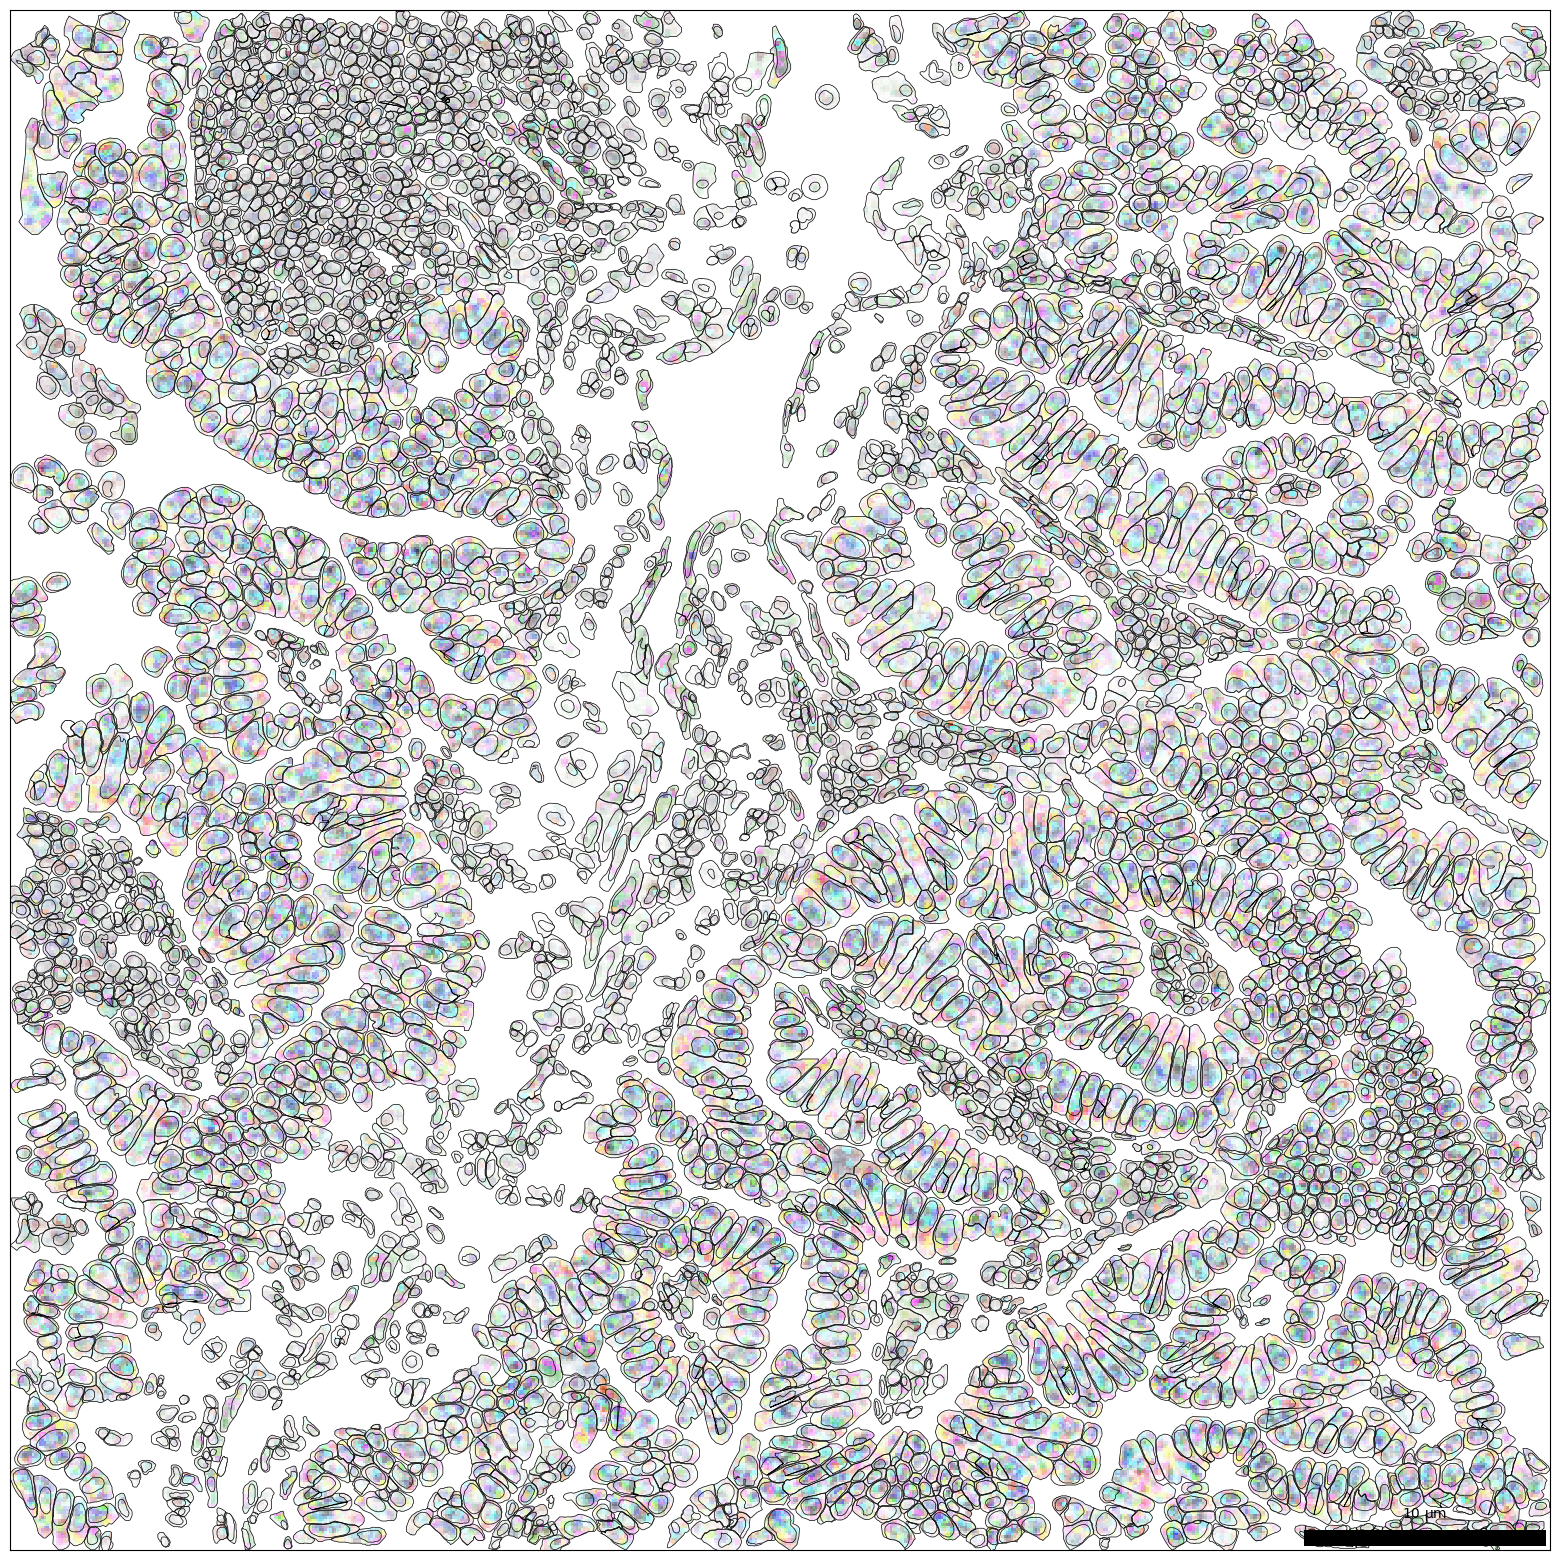

In [23]:
plt.figure(figsize=(20, 20))
bt.pl.flux(crop, res=res)

In [49]:
bt.tl.fluxmap(
    crop,
    n_clusters=2,
    res=res,
    min_count=10,
    train_size=1,
    plot_error=True,
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4064 [00:00<?, ?it/s]

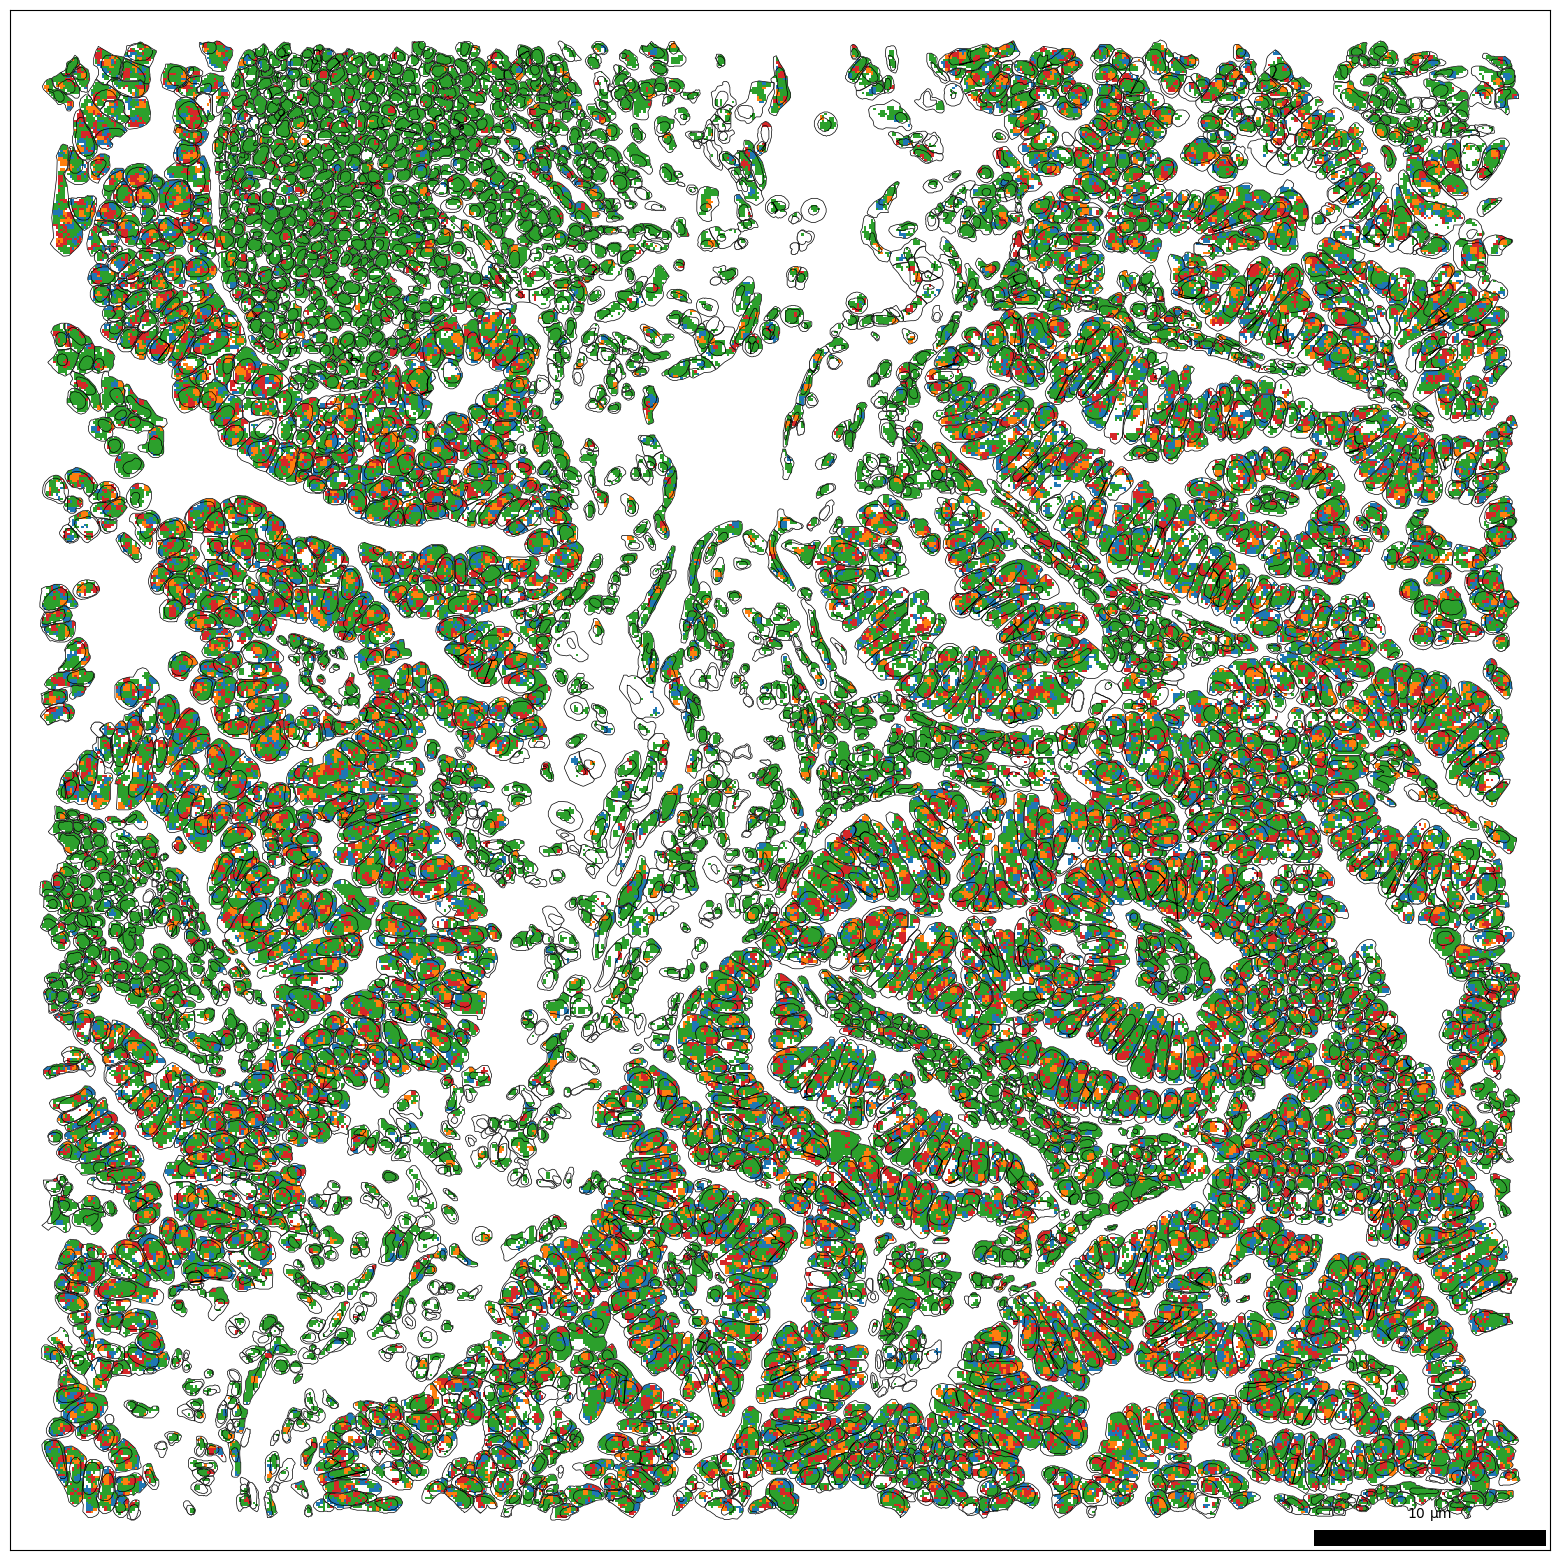

In [47]:
plt.figure(figsize=(20, 20))
bt.pl.fluxmap(crop)